## <span style="color: Navy"> Table des matières </span> 
##### 1.[Introduction](#.-Introduction)

##### 2.[Collecte des données](#.-Collecte_des_données)

##### 3.[Prétraitement](#.-Prétraitement)

##### 4.[Construction du modèle](#.-Construction_du_modèle)

##### 5.[Evaluation du modèle ](#.-Evaluation_du_modèle)



## <p style='text-align: center;'> Analyse des sentiments Tweets 😀 😢 </p> 

## <span style="color: Navy"> 1.Intorduction </span> 

<div style="text-align:center;">
<img src="images/Le flux de travail général de l'analyse des sentiments.png" alt="Analyse des sentiments: Processus" width="400" height="200">
</div>

***

Dans cette étude, notre objectif est de développer un modèle de NLP capable d'analyser les sentiments exprimés dans les tweets. nous utilisons un ensemble de données contenant des tweets pré-étiquetés avec leurs sentiments correspondants.


- L'ensemble de données comprend les colonnes suivantes:

<span Style="color:MediumBlue"> **Target:** </span>  : Cette colonne représente la polarité du sentiment exprimé dans le tweet, avec des valeurs de 0 pour les sentiments négatifs et 4 pour les sentiments positifs.

<span Style="color:MediumBlue"> **ids:** </span> : Chaque tweet est associé à un identifiant unique.

<span Style="color:MediumBlue"> **Date:** </span>  La date et l'heure de publication du tweet.

<span Style="color:MediumBlue"> **Flag** </span>  Un marqueur spécifiant l'origine des données, indiquant si les données proviennent d'une requête spécifique ou non.

<span Style="color:MediumBlue"> **user** </span>  Le nom d'utilisateur de l'auteur du tweet.

<span Style="color:MediumBlue"> **Text** </span>  Le contenu textuel du tweet exprimant le sentiment.

 ## <span style="color:Navy"> 2. Collecte des données </span>

****

<span style="color: DimGray"> **1.1 Importation des bibliothèques**  </span>

In [4]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt


<span Style="color: DimGray"> **1.2 Importation des données**</span> 

In [5]:
colonnes= ['Target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv('datasets\Twitter-Sentiments.csv', encoding='ISO-8859-1', names=colonnes)

In [6]:
df

,Target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


<span style="color:DimGray"> **1.3 exploration des données**</span>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
df.isnull().sum()

Target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

## <span style="color:Navy"> 3. Prétraitement</span>

***

<span style="color:DimGray"> **3.1 Suppression des colonnes non-utiles** </span>

In [9]:
# On va garder les colonnes : Target, id, text
df= df[['Target', 'ids' ,'text']]
df.head()

,Target,ids,text
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."


 <span style="color: DimGray"> **3.2 Covertion de Target 4 à 1**  </span> 

In [10]:
df.loc[df['Target']== 4, 'Target']=1
df.Target.unique()

array([0, 1], dtype=int64)

<span style="color: DimGray"> **3.3 Visualisation des données ( La distribution des classes)** </span> 

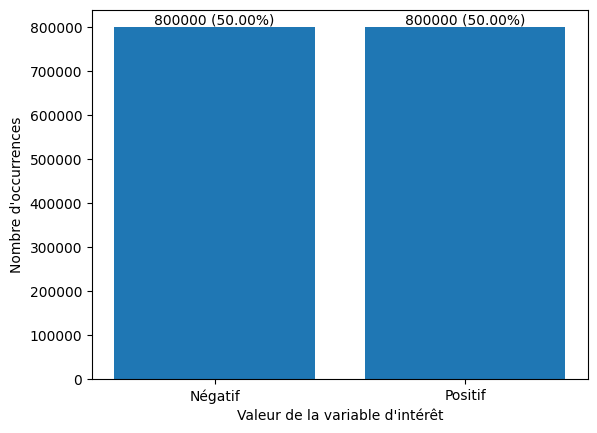

In [11]:
target_counts = df['Target'].value_counts()

# Calcul du proportion pour chaque valeur de la variable d'intérêt (Target)
target_proportions = df['Target'].value_counts(normalize=True)

# Création d'un graphique à barres pour visualiser la distribution
plt.bar(target_counts.index, target_counts.values)

# Ajoute des étiquettes des barres (nombre d'occurrences et proportion)
for i, count in enumerate(target_counts):
    proportion = target_proportions[i]
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

# Étiquetage de l'axe des x et y
plt.xlabel('Valeur de la variable d\'intérêt')
plt.ylabel('Nombre d\'occurrences')

# Ajoute d'une légende aux barres
plt.xticks(target_counts.index, ['Négatif', 'Positif'])

# Affichage du graphique
plt.show()

<span style="color:DimGray"> **3.4 Racinisation** </span> 

In [12]:
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [13]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [14]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [15]:
def lemmitizer(content):
    # Suppression des caractères non alphabétiques
    texte_nettoye = re.sub('[^a-zA-Z]', ' ', content)
    # Suppression des adresses URL
    content = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', content)
    content = content.lower()
    # Tokenization
    tokens = content.split()
    # Lemmatisation et suppression des mots vides
    lemmitized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    # Reconstruction du texte
    lemmitized_text = ' '.join(lemmitized_tokens)
    return lemmitized_text


# On applique le nettoyage du texte sur la colonne 'texte'
df['texte_nettoye'] = df['text'].apply(lemmitizer)

C:\Users\pc\AppData\Local\Temp\ipykernel_7508\2918988796.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['texte_nettoye'] = df['text'].apply(lemmitizer)


In [16]:
df.head()

,Target,ids,text,texte_nettoye
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot awww, that's bummer. shoulda got d..."
1,0,1467810672,is upset that he can't update his Facebook by ...,upset can't update facebook texting it... migh...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,@kenichan dived many time ball. managed save 5...
3,0,1467811184,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, behaving all. i'm mad. he..."


<span style='color:DimGray'> **3.5 Visualisation** </spand>

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

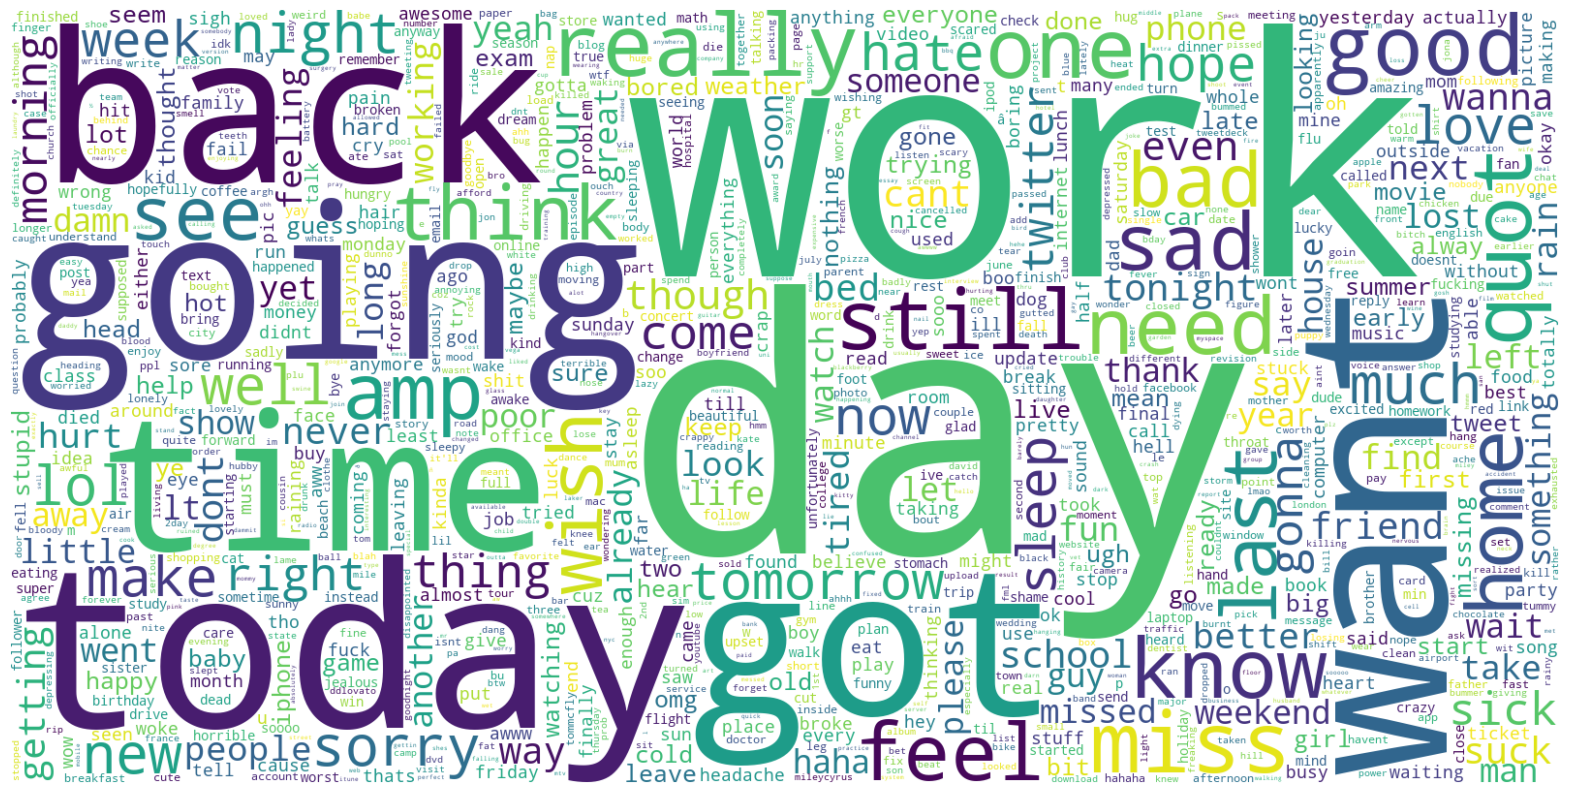

In [18]:
#filtrage des tweets Negatif 
data_neg= df[df['Target'] == 0]['texte_nettoye']

#Création d'un nuage de mots  
wc = WordCloud(max_words = 1000, width=1600, height = 800, collocations= False, background_color='white').generate("".join(data_neg))

#affichage 
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

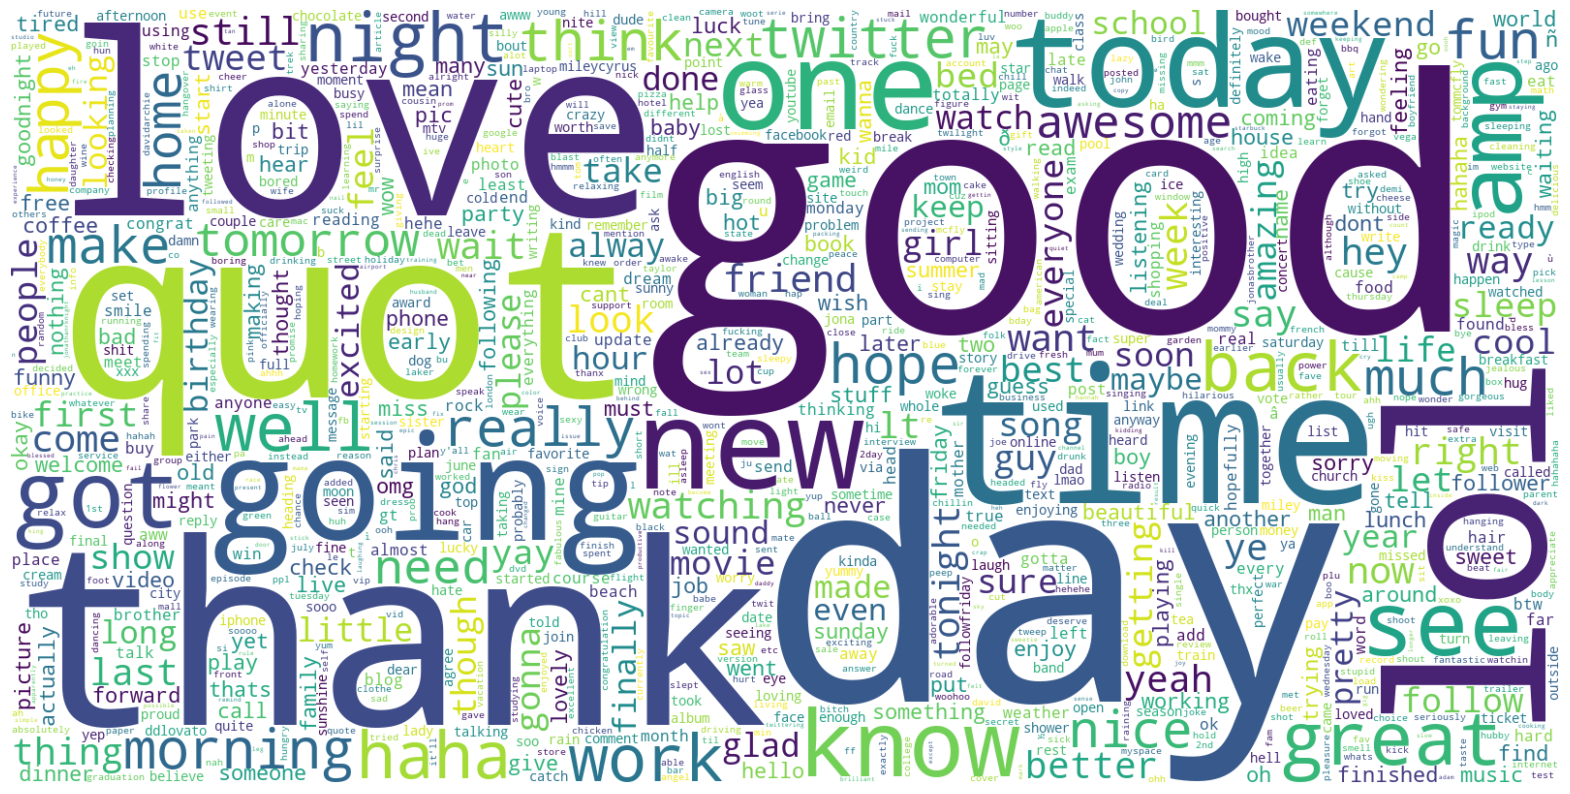

In [19]:
#filtrage des tweets posifit
data_neg = df[df['Target'] == 1]['texte_nettoye']

# Créer un nuage de mots à partir des données négatives
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False, background_color='white').generate(" ".join(data_neg))

# Afficher le nuage de mots
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<span style='color:DimGray'> **3.6 Modélisation** </spand>

* Séparation des données

In [20]:
X=df['texte_nettoye'].values
Y=df['Target'].values

**X:** Représente la variable indépendante

**Y:** Représente la variable dépendante

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

<span style='color:DimGray'> **3.7 Convertion du texte en numérique** </spand>

In [22]:
vectorizer= TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

 ## <span style='color:Navy'> 4.Construction du modèle </span>

****

<span style='color:DimGray'>  **Construction du modèle** </span> 

In [23]:
#Logstic regression
model =LogisticRegression(max_iter=1000)

In [24]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## <span style='color:Navy'> 5.Evaluation du modèle </span>

****

<span style='color:DimGray'> **5.1 Accuracy et précision** </span>

* Accuracy

In [25]:
Y_predict=model.predict(X_test)
accuracy=accuracy_score(y_test,Y_predict)
print('Accuracy:', accuracy)

Accuracy: 0.78509375


* Précision

In [26]:
precision=precision_score(y_test,Y_predict)
precision

0.7746667148379638

## <span style='color:Navy'> Prédiction  </span>

****

* Positif

In [27]:
# Text
text = "I'm happy!"

# Appliquer la fonction de racinisation à la nouvelle observation
lemmatized_new_text = lemmitizer(text)

#Conversion du text
vectorized_new_text = vectorizer.transform([lemmatized_new_text])

# Prédiction
prediction = model.predict(vectorized_new_text)

# Affichage des résultats
if prediction == 0:
    print("Sentiment est: négatif 😢.")
else:
    print("Sentiment est:  positif 😀.")

Sentiment est:  positif 😀.


* Négatif

In [28]:
# Text
text = "It's a saad day!"

# On applique la fonction de racinisation à la nouvelle observation
lemmatized_new_text = lemmitizer(text)

#Conversion du text
vectorized_new_text = vectorizer.transform([lemmatized_new_text])

# Prédiction
prediction = model.predict(vectorized_new_text)

# Affichage des résultats
if prediction == 0:
    print("Sentiment est: négatif 😢.")
else:
    print("Sentiment est:  positif 😀 .")

Sentiment est: négatif 😢.


* sauvgarder le modèle 

In [29]:
import pickle

In [30]:
filename = 'trained_model_RL.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)


In [31]:
filename = 'vectorizer_RL.sav'
with open(filename, 'wb') as file:
    pickle.dump(vectorizer, file)
